In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import quandl
import nasdaqdatalink
from datetime import timedelta 
import random
import csv
import warnings
import numpy as np
from typing import List 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [136]:
df = pd.read_parquet(r'C:\Users\16177\Desktop\work\QTS\Project\master_crypto_data_2015-01-01_2025-02-24_1d.parquet', engine="pyarrow") 
df['Open time'] = pd.to_datetime(df['Open time']) 
df['Close'] = df['Close'].astype(float)
tickers  =  df['Ticker'].unique() 
df = df.set_index(['Ticker','Open time'])

In [137]:
returns = pd.DataFrame()  

for ticker in tickers:
    rets = df.loc[ticker, 'Close'].pct_change()  
    rets.name = ticker  
    returns = returns.join(rets, how='outer') if not returns.empty else rets.to_frame()

returns = returns.iloc[:,:15]
returns.dropna(inplace=True)
returns

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,BNBUSDT,ADAUSDT,BATUSDT,ETCUSDT,XLMUSDT,ZRXUSDT,DOGEUSDT,ATOMUSDT,NEOUSDT,VETUSDT
Open time,,,,,,,,,,,,,,,
2019-11-09 00:00:00+00:00,0.003304,0.006862,0.017535,0.021673,0.027792,0.000834,0.005920,0.040489,-0.007328,0.028977,0.033345,0.029545,0.033403,-0.005813,-0.036565
2019-11-10 00:00:00+00:00,0.026010,0.022881,-0.004032,0.035603,0.026396,0.039325,0.032957,-0.006080,0.015450,0.080383,0.012512,0.018409,0.055303,0.046680,0.157065
2019-11-11 00:00:00+00:00,-0.034005,-0.022581,-0.017768,-0.021645,-0.033088,-0.017953,-0.017320,-0.022023,-0.027569,0.012400,-0.007805,-0.020638,0.041158,0.004325,0.009924
2019-11-12 00:00:00+00:00,0.010281,0.011145,-0.010394,0.007537,-0.004703,0.042365,0.014378,0.007506,0.002063,-0.037620,-0.012455,-0.001326,-0.028729,0.091056,0.092438
2019-11-13 00:00:00+00:00,-0.003455,0.005351,0.002838,-0.007412,-0.007496,0.020131,-0.009374,0.055050,-0.011884,-0.011688,0.001328,-0.009444,-0.053005,0.083539,-0.042842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-22 00:00:00+00:00,0.003772,0.039159,0.002725,0.030119,-0.018899,0.031094,0.015086,0.029659,0.024635,0.027027,0.031562,0.031332,0.043880,0.029412,0.050616
2025-02-23 00:00:00+00:00,-0.003796,0.021104,-0.002096,0.018040,0.027031,-0.013962,-0.003231,-0.003804,0.027969,-0.001495,-0.016547,-0.016909,-0.022325,0.007619,-0.012662
2025-02-24 00:00:00+00:00,-0.048744,-0.109873,-0.115196,-0.110296,-0.116240,-0.070328,-0.116816,-0.108020,-0.109785,-0.106020,-0.090794,-0.131882,-0.102242,-0.134216,-0.127620


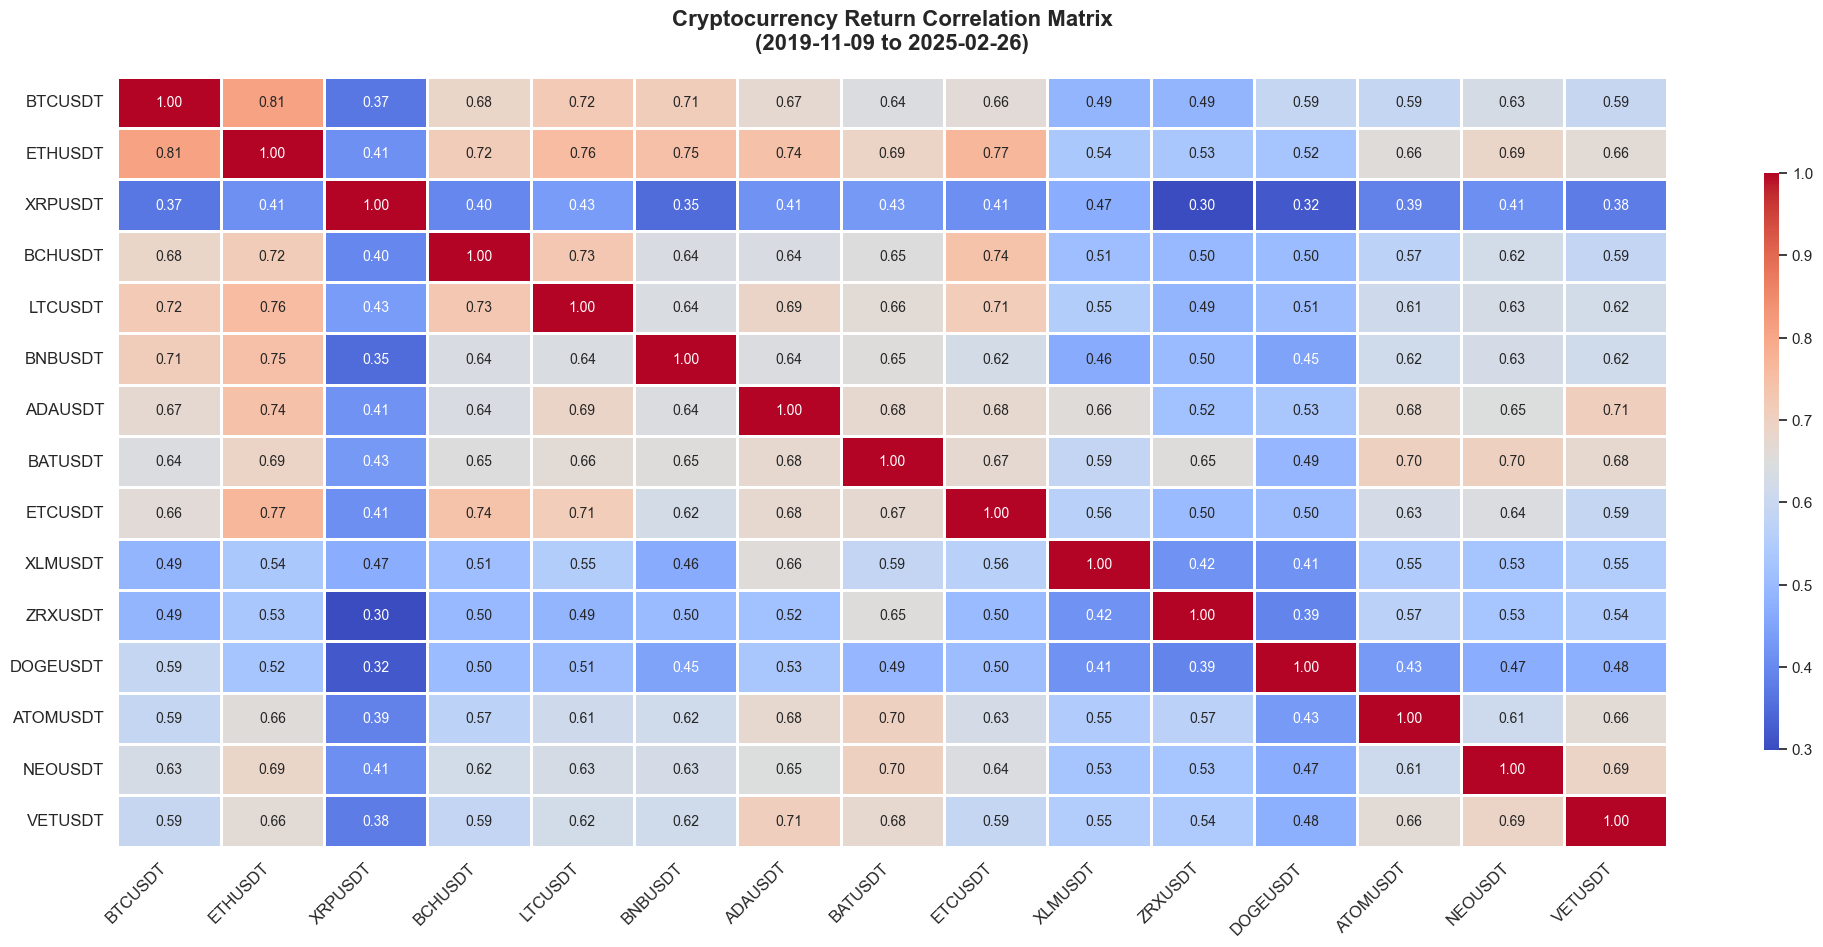

In [138]:
# Compute correlation matrix
corr = returns.corr()

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set_theme(style="whitegrid")

# Create heatmap with enhanced aesthetics
ax = sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.75,
    annot_kws={"size": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.75, "aspect": 40}  # Adjust color bar size
)

# Add a more prominent title
plt.title(
    "Cryptocurrency Return Correlation Matrix\n(2019-11-09 to 2025-02-26)", 
    fontsize=16, fontweight="bold", pad=20
)

# Improve tick label visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Show the plot
plt.show()

In [139]:
regression = pd.DataFrame(index = returns.columns[2:])
residual_returns = pd.DataFrame(columns=returns.columns[2:])

for ticker in returns.columns[2:]: 

    X = returns[['BTCUSDT','ETHUSDT']]
    Y = returns[ticker] 
    X = sm.add_constant(X)

    model = sm.OLS(Y,X).fit() 

    alpha = model.params[0] 
    alpha_p = model.pvalues[0]
    beta = model.params[1] 
    beta_p = model.pvalues[1] 
    gamma = model.params[2]  
    gamma_p = model.pvalues[2] 

    regression.loc[ticker, 'Alpha'] = alpha 
    regression.loc[ticker, 'Alpha P Value'] = alpha_p
    regression.loc[ticker, 'Beta'] = beta
    regression.loc[ticker, 'Beta P Value'] = beta_p
    regression.loc[ticker, 'Gamma'] = gamma
    regression.loc[ticker, 'Gamma P Value'] = gamma_p

    residual_returns[ticker] = model.resid
regression.head() 

,Alpha,Alpha P Value,Beta,Beta P Value,Gamma,Gamma P Value
XRPUSDT,0.001655,0.383757,0.219587,3.137958e-02,0.534440,2.039790e-11
BCHUSDT,-0.001213,0.272579,0.501416,9.377262e-17,0.603962,1.115538e-36
LTCUSDT,-0.000845,0.335963,0.444570,2.473715e-20,0.551005,9.324491e-47
BNBUSDT,-0.000051,0.946043,0.362720,9.323872e-19,0.453330,8.293979e-44
ADAUSDT,0.000886,0.389830,0.325720,5.024812e-09,0.706725,1.293935e-54


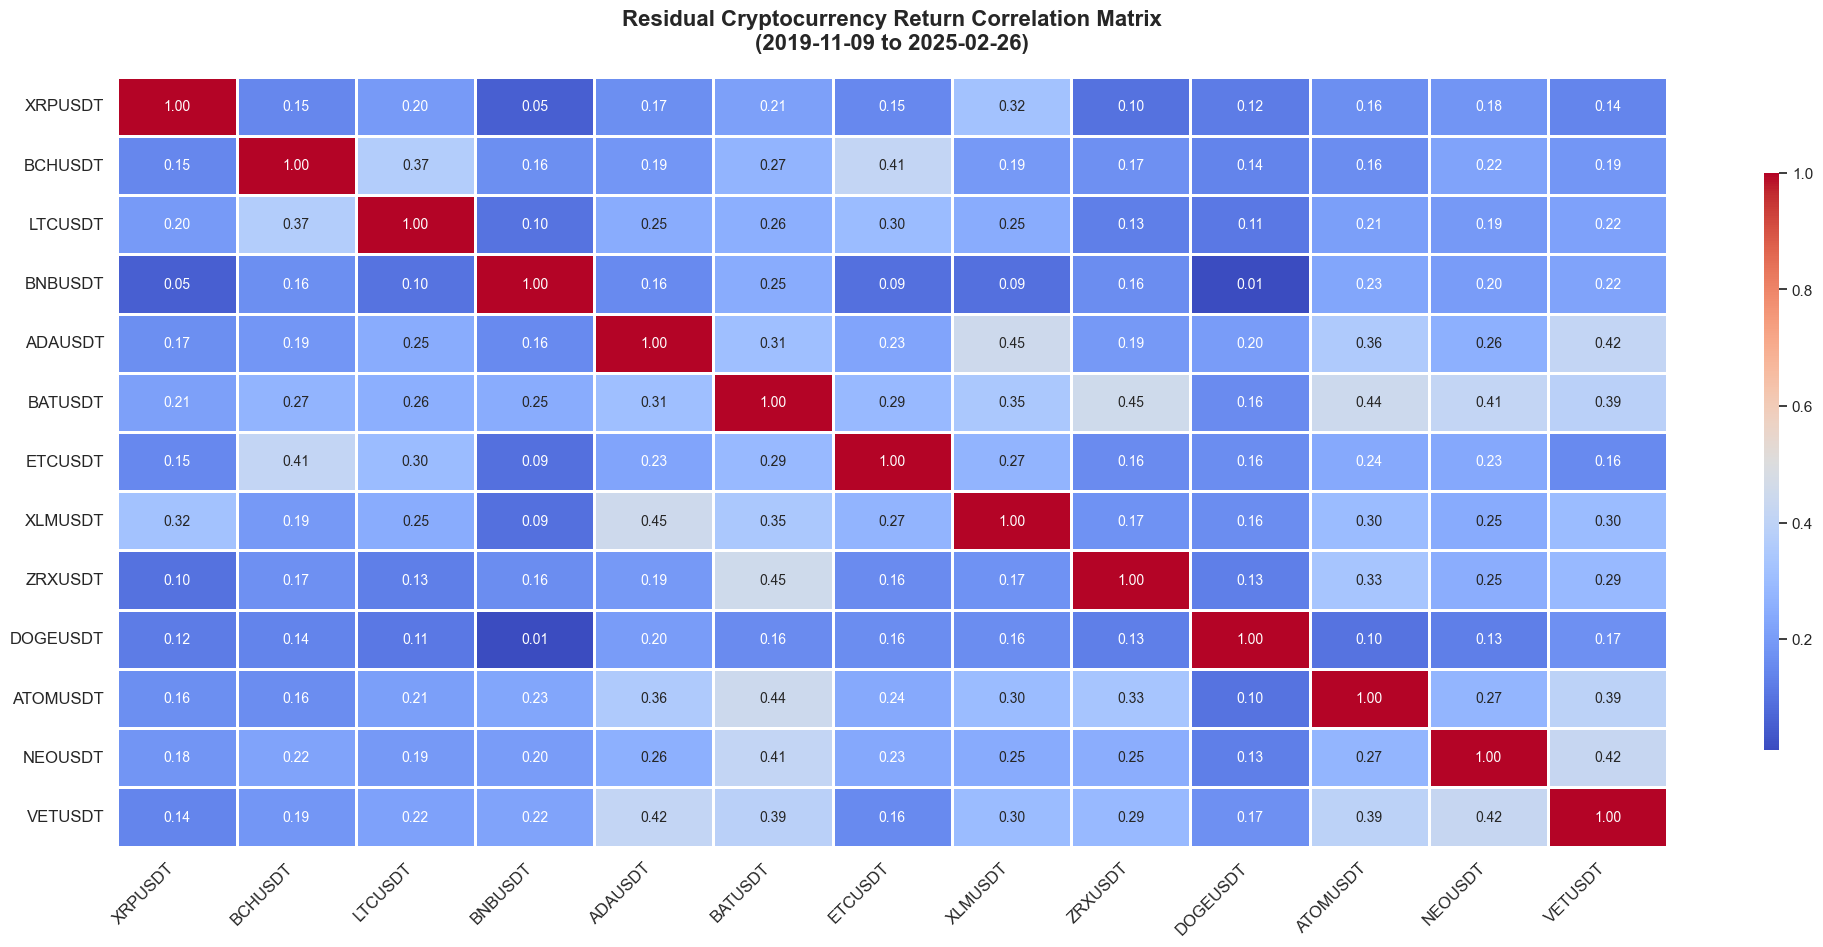

In [140]:

# Compute correlation matrix
corr = residual_returns.corr()

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set_theme(style="whitegrid")

# Create heatmap with enhanced aesthetics
ax = sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.75,
    annot_kws={"size": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.75, "aspect": 40}  # Adjust color bar size
)

# Add a more prominent title
plt.title(
    "Residual Cryptocurrency Return Correlation Matrix\n(2019-11-09 to 2025-02-26)", 
    fontsize=16, fontweight="bold", pad=20
)

# Improve tick label visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Show the plot
plt.show()

In [141]:
AR_regression_daily = pd.DataFrame(columns=['AR Beta', 'AR Beta P Value'])  

for ticker in returns.columns:
    X = returns[ticker].shift(2)
    Y = returns[ticker]

    df = pd.concat([X, Y], axis=1).dropna()  
    X, Y = df.iloc[:, 0], df.iloc[:, 1]

    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()

    AR_regression_daily.loc[ticker] = [model.params[1], model.pvalues[1]] 

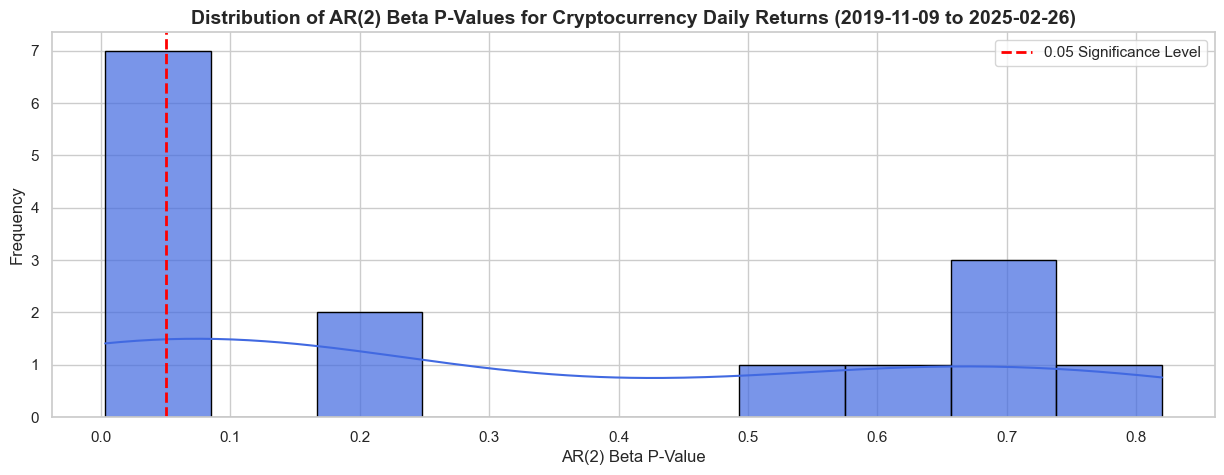

In [161]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_daily['AR Beta P Value'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta P-Values for Cryptocurrency Daily Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

# Add a vertical line at 0.05 significance threshold
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label="0.05 Significance Level")

# Add legend
plt.legend()

# Show the plot
plt.show()

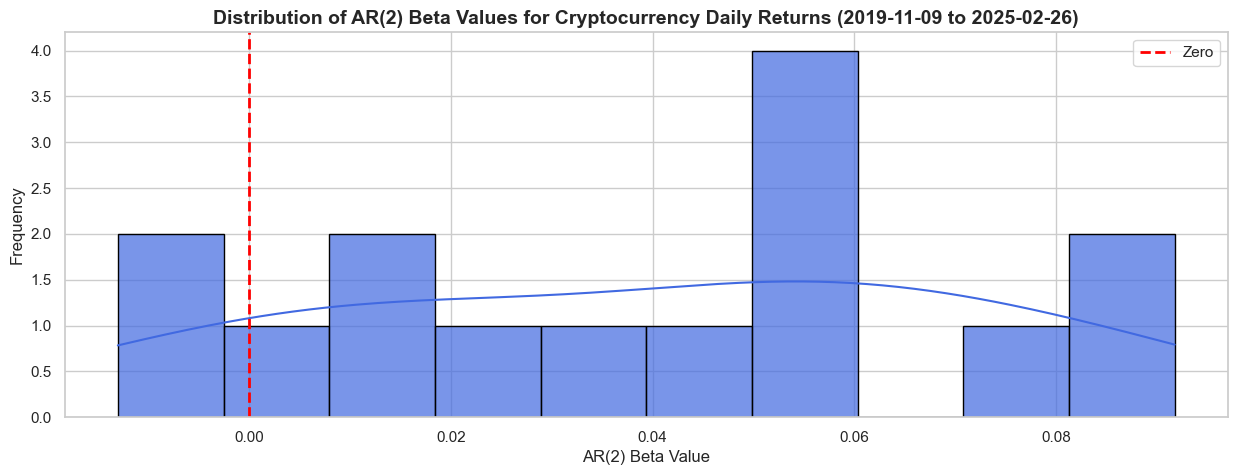

In [143]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_daily['AR Beta'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta Values for Cryptocurrency Daily Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero")


# Add legend
plt.legend()

# Show the plot
plt.show()

In [144]:
weekly_returns = returns.resample('W-FRI').apply(lambda x: (1 + x).prod() - 1)
weekly_returns

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,BNBUSDT,ADAUSDT,BATUSDT,ETCUSDT,XLMUSDT,ZRXUSDT,DOGEUSDT,ATOMUSDT,NEOUSDT,VETUSDT
Open time,,,,,,,,,,,,,,,
2019-11-15 00:00:00+00:00,-0.035017,-0.019171,-0.053875,-0.047573,-0.047146,0.030864,0.048070,0.057782,-0.086934,0.014911,-0.057503,0.001475,0.032098,0.126477,0.474405
2019-11-22 00:00:00+00:00,-0.140572,-0.167083,-0.117378,-0.212728,-0.177951,-0.234624,-0.164257,-0.126396,-0.150579,-0.174913,-0.122022,-0.122691,-0.256131,-0.196338,-0.319089
2019-11-29 00:00:00+00:00,0.062429,0.028533,-0.000522,0.078572,0.025554,0.043402,0.116518,-0.017800,0.053799,-0.010079,0.122122,0.011109,0.357580,0.002278,0.211804
2019-12-06 00:00:00+00:00,-0.026772,-0.037529,-0.019487,-0.049712,-0.066722,-0.033533,-0.072155,-0.101301,-0.046667,-0.061259,-0.111030,-0.071158,-0.089134,-0.098367,0.072596
2019-12-13 00:00:00+00:00,-0.036782,-0.025456,-0.022136,-0.006627,-0.020962,-0.051230,-0.034447,-0.031024,-0.008377,-0.047722,-0.090272,-0.022831,0.092633,0.020857,-0.155338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31 00:00:00+00:00,-0.022944,-0.004468,-0.021006,-0.003756,0.080815,-0.003385,-0.029488,-0.026258,-0.008853,-0.039498,-0.056726,-0.064855,0.006113,0.020086,-0.021890
2025-02-07 00:00:00+00:00,-0.058198,-0.204421,-0.211571,-0.249529,-0.195031,-0.146359,-0.250186,-0.242697,-0.291403,-0.208757,-0.278841,-0.249596,-0.302686,-0.246835,-0.302561
2025-02-14 00:00:00+00:00,0.010517,0.039259,0.141915,0.071272,0.208999,0.138339,0.134316,0.124036,0.116071,0.071232,0.108918,0.106076,0.126118,0.068161,0.077137


In [145]:
AR_regression_weekly = pd.DataFrame(columns=['AR Beta', 'AR Beta P Value'])  

for ticker in returns.columns:
    X = weekly_returns[ticker].shift(2)
    Y = weekly_returns[ticker]

    df = pd.concat([X, Y], axis=1).dropna()  
    X, Y = df.iloc[:, 0], df.iloc[:, 1]

    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()

    AR_regression_weekly.loc[ticker] = [model.params[1], model.pvalues[1]] 

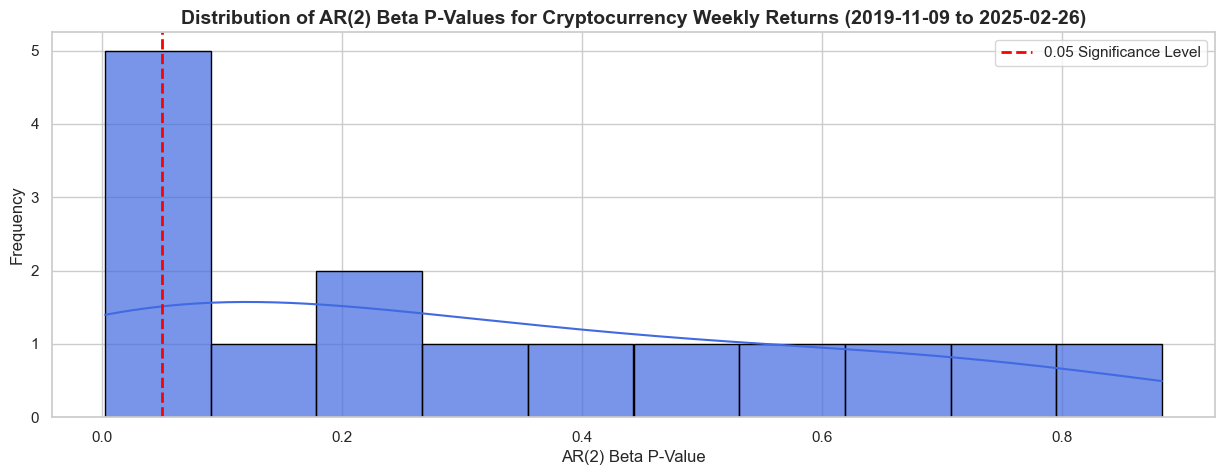

In [146]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_weekly['AR Beta P Value'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta P-Values for Cryptocurrency Weekly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

# Add a vertical line at 0.05 significance threshold
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label="0.05 Significance Level")

# Add legend
plt.legend()

# Show the plot
plt.show()

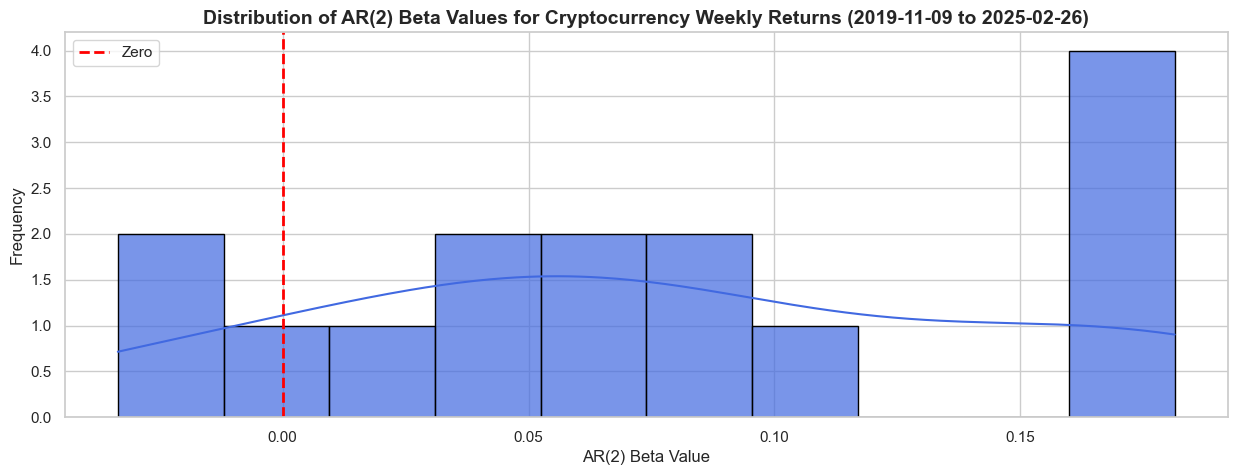

In [147]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_weekly['AR Beta'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta Values for Cryptocurrency Weekly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero")


# Add legend
plt.legend()

# Show the plot
plt.show()

In [148]:
monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

In [149]:
AR_regression_monthly = pd.DataFrame(columns=['AR Beta', 'AR Beta P Value'])  

for ticker in returns.columns:
    X = monthly_returns[ticker].shift(2)
    Y = monthly_returns[ticker]

    df = pd.concat([X, Y], axis=1).dropna()  
    X, Y = df.iloc[:, 0], df.iloc[:, 1]

    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()

    AR_regression_monthly.loc[ticker] = [model.params[1], model.pvalues[1]] 

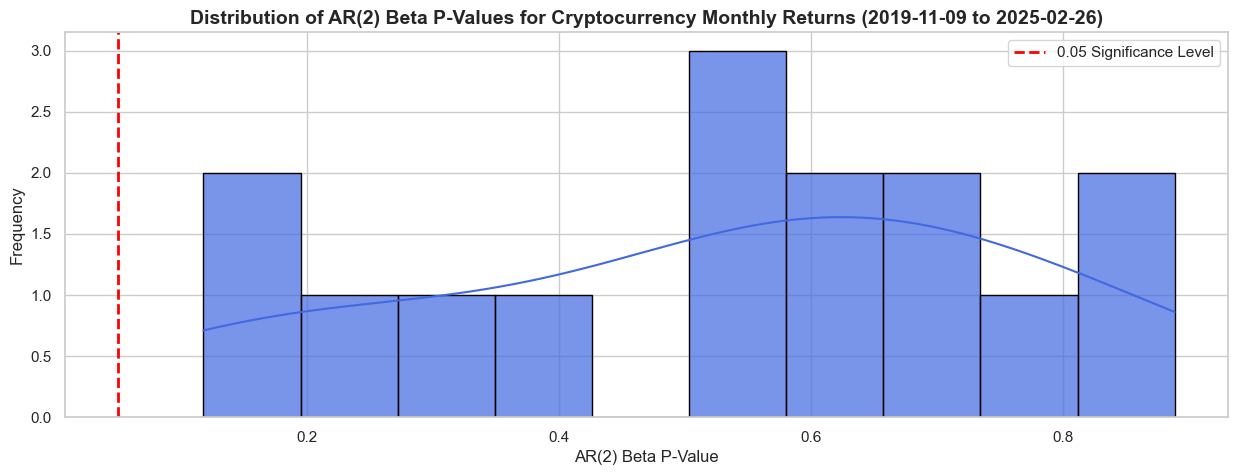

In [150]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_monthly['AR Beta P Value'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta P-Values for Cryptocurrency Monthly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

# Add a vertical line at 0.05 significance threshold
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label="0.05 Significance Level")

# Add legend
plt.legend()

# Show the plot
plt.show()

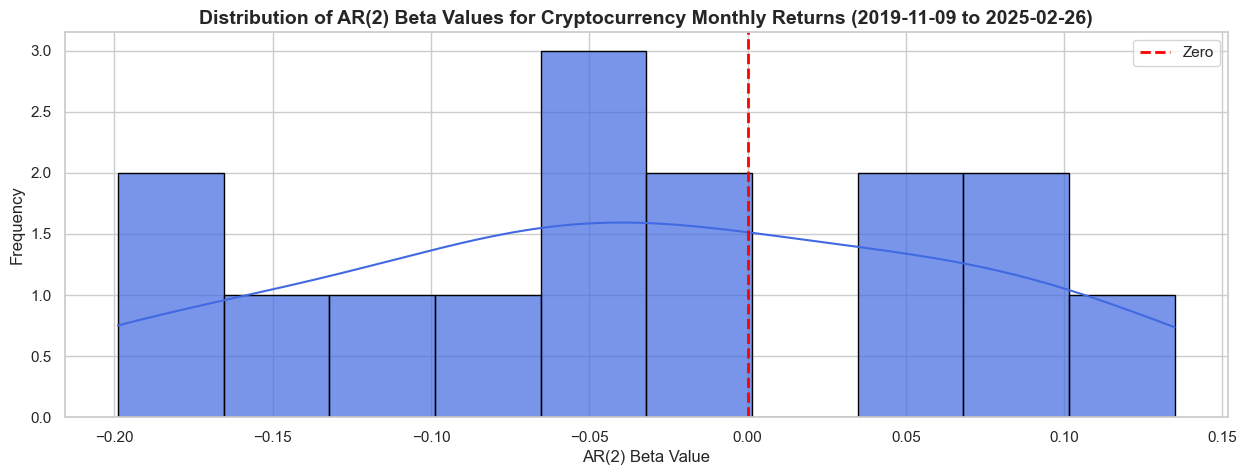

In [151]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_monthly['AR Beta'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta Values for Cryptocurrency Monthly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero")


# Add legend
plt.legend()

# Show the plot
plt.show()

In [152]:
weekly_residuals = residual_returns.resample('W-FRI').apply(lambda x: (1 + x).prod() - 1)

In [153]:
AR_regression_weekly_res = pd.DataFrame(columns=['AR Beta', 'AR Beta P Value'])  

for ticker in weekly_residuals.columns:
    X = weekly_residuals[ticker].shift(2)
    Y = weekly_residuals[ticker]

    df = pd.concat([X, Y], axis=1).dropna()  
    X, Y = df.iloc[:, 0], df.iloc[:, 1]

    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()

    AR_regression_weekly_res.loc[ticker] = [model.params[1], model.pvalues[1]] 

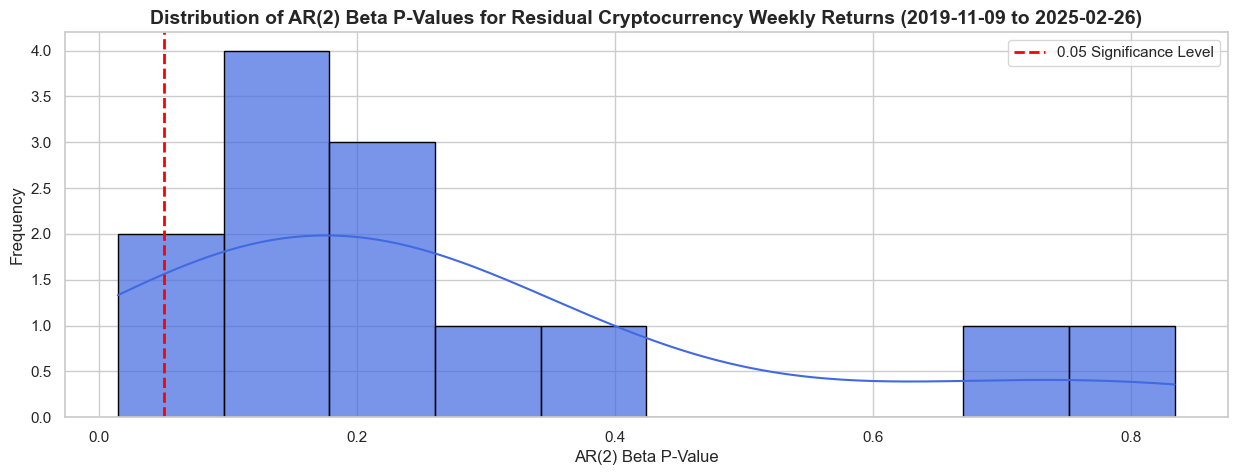

In [154]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_weekly_res['AR Beta P Value'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta P-Values for Residual Cryptocurrency Weekly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

# Add a vertical line at 0.05 significance threshold
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label="0.05 Significance Level")

# Add legend
plt.legend()

# Show the plot
plt.show()

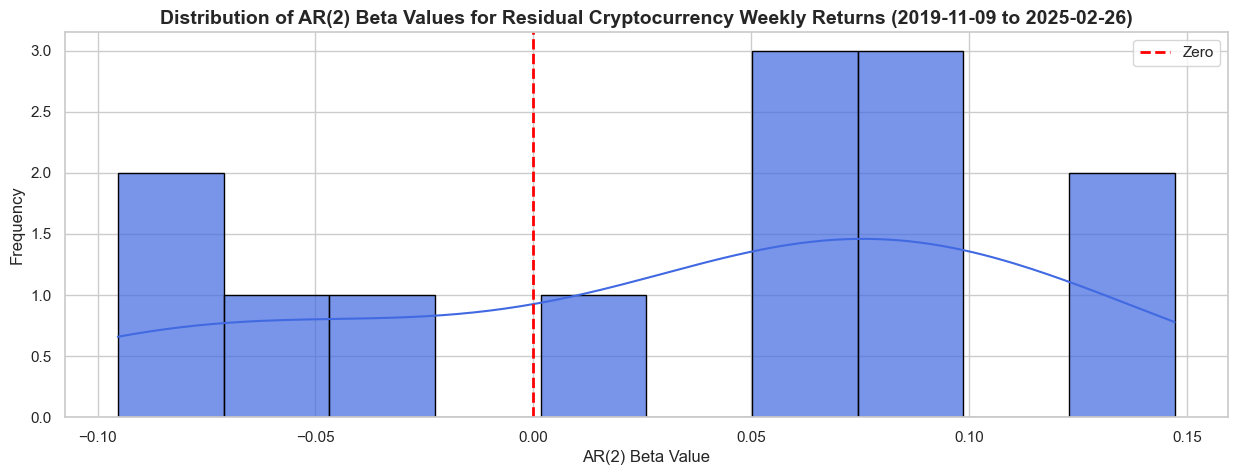

In [155]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_weekly_res['AR Beta'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta Values for Residual Cryptocurrency Weekly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero")


# Add legend
plt.legend()

# Show the plot
plt.show()

In [156]:
monthly_residuals = residual_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

In [157]:
AR_regression_monthly_res = pd.DataFrame(columns=['AR Beta', 'AR Beta P Value'])  

for ticker in monthly_residuals.columns:
    X = monthly_residuals[ticker].shift(2)
    Y = monthly_residuals[ticker]

    df = pd.concat([X, Y], axis=1).dropna()  
    X, Y = df.iloc[:, 0], df.iloc[:, 1]

    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()

    AR_regression_monthly_res.loc[ticker] = [model.params[1], model.pvalues[1]] 

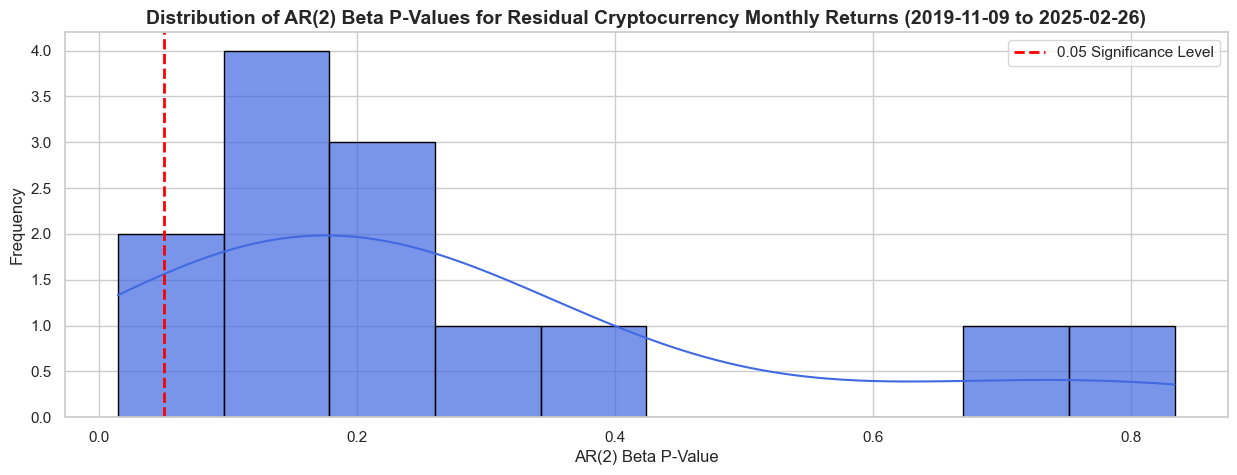

In [158]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_weekly_res['AR Beta P Value'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta P-Values for Residual Cryptocurrency Monthly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

# Add a vertical line at 0.05 significance threshold
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label="0.05 Significance Level")

# Add legend
plt.legend()

# Show the plot
plt.show()

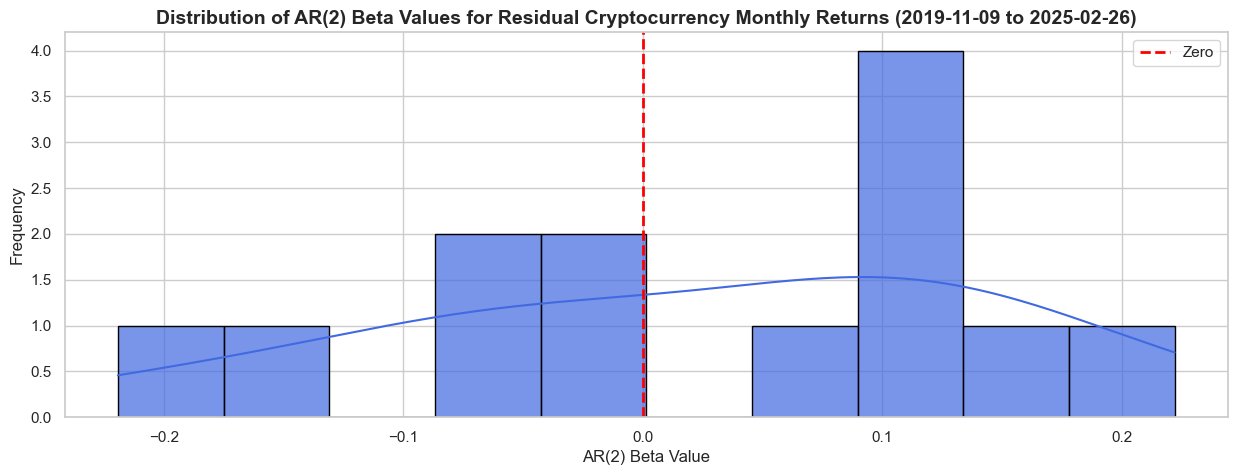

In [159]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the histogram with KDE overlay
plt.figure(figsize=(15, 5))
sns.histplot(AR_regression_monthly_res['AR Beta'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel("AR(2) Beta Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AR(2) Beta Values for Residual Cryptocurrency Monthly Returns (2019-11-09 to 2025-02-26)", fontsize=14, fontweight='bold')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero")


# Add legend
plt.legend()

# Show the plot
plt.show()